# MATH2504 Project 1 - 2023

## Emmanuel Skoufris - 46388078 

GitHub repository for this project: https://github.com/ESkoufris/Emmanuel-Skoufris-2504-2023-PROJECT1.git

### Tests

In [1]:
using Pkg
Pkg.activate(".")

include("poly_factorization_project.jl")

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`

10	25	35	


(i, value) = (10, "kbwcr")
(i, value) = (20, "dcsha")
(i, value) = (30, "oxgil")
(i, value) = (40, "xteol")
(i, value) = (50, "amqcl")
(i, value) = (60, "olqwn")
(i, value) = (70, "tdcjf")
(i, value) = (80, "dxksw")
(i, value) = (90, "yvzkb")
(i, value) = (100, "qbimw")


l = MutableLinkedList{String}(amqcl, dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
d[50] = DataStructures.ListNode{String}(amqcl)
d[90] = DataStructures.ListNode{String}(yvzkb)
get_element(l, d, 50) = "amqcl"
l = MutableLinkedList{String}(dcsha, dxksw, kbwcr, olqwn, oxgil, qbimw, tdcjf, xteol, yvzkb)
length(l) = 9
get_element(l, d, 50) = nothing
get_next_element(l, d, 90) = nothing
get_element(l, d, 40) = "xteol"
get_next_element(l, d, 40) = "yvzkb"

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project1\Emmanuel-Skoufris-2504-2023-PROJECT1`


In [3]:

include("test/runtests.jl")

#= 
####
# Execute unit tests for integers
###
include("test/integers_test.jl")
test_euclid_ints()
test_ext_euclid_ints()

####
# Execute unit tests for polynomials
####
include("test/polynomials_test.jl")
prod_test_poly()
prod_derivative_test_poly()
ext_euclid_test_poly()
division_test_poly()

####
# Execute unit tests for polynomial factorization
####
include("test/factorization_test.jl")
factor_test_poly() =#

## Task 1

### Example script 2

### Pretty printing 

I created a 'superscript' function that prints a number in superscript using Unicode.

In [ ]:
function superscript(n::Int)

    digit_to_unicode = Dict(
        '0' => 0x2070,
        '1' => 0x00B9,
        '2' => 0x00B2,
        '3' => 0x00B3,
        '4' => 0x2074,
        '5' => 0x2075,
        '6' => 0x2076,
        '7' => 0x2077,
        '8' => 0x2078,
        '9' => 0x2079 
    )

    n_str = string(n)

    unicode_str = ""

    for i in n_str
        unicode_digit = Char(digit_to_unicode[i])
        unicode_str *= unicode_digit
    end

    return unicode_str
end

I then altered the show function for individual polynomial terms. 

In [ ]:
function show(io::IO, t::Term)  

    iszero(t.coeff) && return print(io,"0")
    iszero(t.degree) && return print(io,t.coeff)

    if abs(t.coeff) == 1
        print(io, t.coeff == 1 ? "x" : "-x", t.degree == 1 ? "" : superscript(t.degree)) 
    else 
        print(io, "$(t.coeff)x", t.degree == 1 ? "" : superscript(t.degree))
    end
    
end

Finally, I altered the show function for polynomials. 

In [ ]:
# By default, print from highest to lowest powers. 
global lowest_to_highest = false

# modified show for polynomials  
function show(io::IO, p::Polynomial) 

    if iszero(p)
        print(io,"0")
    else
        n = length(p.terms)
        (hasproperty(Main, :lowest_to_highest) && lowest_to_highest) ?  p_terms = p.terms  : p_terms = reverse(p.terms)
        for (i,t) in enumerate([y for y in p_terms if !iszero(y)])
            print(io, i==1 ? "$t" : (t.coeff ≥ 0 ? " + $t" : " - $(-t)"))
        end
    end
    
end

In [17]:
x = x_poly();

print(x^2 - 5x^3 - x + 0*x^6 + 400x^4)

400x⁴ - 5x³ + x² - x

## Task 2

I have implemented PolynomialSparse in new files in the source code. 

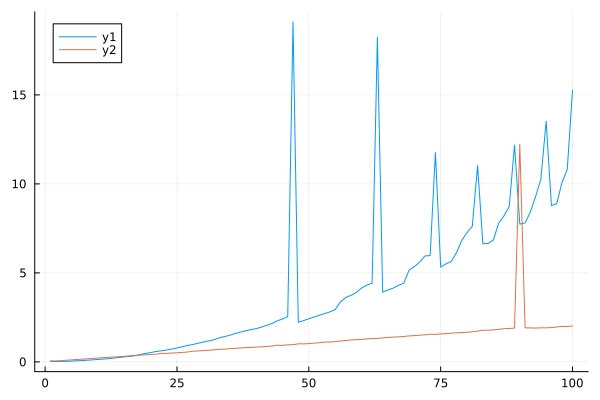

In [3]:
x = x_poly()
q = x^5

using Plots
times = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = x^n 
    p*q
    end_time = time_ns()
    times[n] = Int(end_time - start_time)/10^6
end

p1 = plot(1:100, times)

y = x_polysparse()
u = y^5

times1 = zeros(100)

for n in 1:100
    start_time = time_ns()
    p = y^n 
    p*u
    end_time = time_ns()
    times1[n] = Int(end_time - start_time)/10^6
end

p2 = plot!(1:100, times1)
    

As seen in the plot, multiplying polynomials with large degrees is much more efficient with PolynomialSparse. Moreover....

However, one advantage of PolynomialDense is that its implementation is much more simple than that of PolynomialSparse. 